In [1112]:
import pandas as pd
from fredapi import Fred
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add config module to sys path
sys.path.insert(0, os.path.abspath('../config'))

# Import API key
from api_keys import fred_api_key


In [1113]:
# State for analysis - Oklahoma
state = 'OK'

# Date range - 8 years (Rental data available from Zillow)
start_date = '2013-12-31'
end_date = '2022-01-01'

In [1114]:
# Read FRED API Key

fred = Fred(api_key=f'{fred_api_key}')

In [1115]:
# FRED API - GS10 - Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity(Monthly)
data_10year_treasury = pd.DataFrame(fred.get_series('GS10'))

In [1116]:
# Reset index
data_10year_treasury = data_10year_treasury.reset_index()

In [1117]:
# Rename column
data_10year_treasury = data_10year_treasury.rename(columns = {0 : '10-Year Treasury', 'index' : 'Date'})

In [1118]:
data_10year_treasury['Date_Conv'] = pd.to_datetime(data_10year_treasury['Date'])

In [1119]:
data_10year_treasury['Year'] = data_10year_treasury['Date_Conv'].dt.year

In [1120]:
data_10year_treasury['Month'] = data_10year_treasury['Date_Conv'].dt.month

In [1121]:
data_10year_treasury

,Date,10-Year Treasury,Date_Conv,Year,Month
0,1953-04-01,2.83,1953-04-01,1953,4
1,1953-05-01,3.05,1953-05-01,1953,5
2,1953-06-01,3.11,1953-06-01,1953,6
3,1953-07-01,2.93,1953-07-01,1953,7
4,1953-08-01,2.95,1953-08-01,1953,8
...,...,...,...,...,...
843,2023-07-01,3.90,2023-07-01,2023,7
844,2023-08-01,4.17,2023-08-01,2023,8
845,2023-09-01,4.38,2023-09-01,2023,9
846,2023-10-01,4.80,2023-10-01,2023,10


In [1122]:
data_10year_treasury = data_10year_treasury.loc[ (data_10year_treasury['Date'] > start_date) 
                                                & (data_10year_treasury['Date'] < end_date), :]

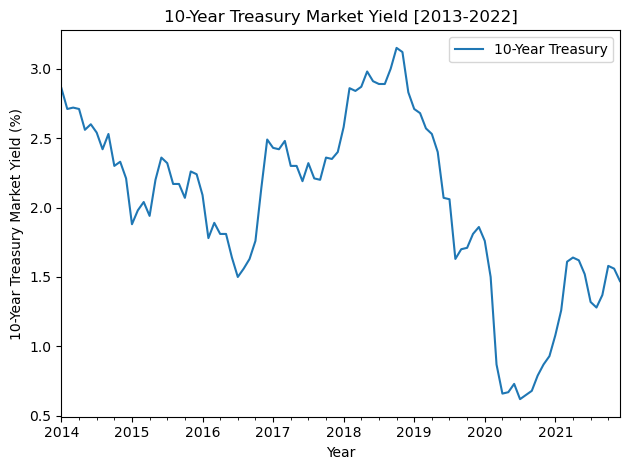

In [1201]:
data_10year_treasury.plot(x='Date', y='10-Year Treasury', kind='line')
plt.xlabel('Year')
plt.ylabel('10-Year Treasury Market Yield (%)')
plt.title('10-Year Treasury Market Yield [2013-2022]')
plt.tight_layout()

plt.savefig('../output/10-year-treasury-market-yield.png')

plt.show()

In [1124]:
# Read Zillow Data - full dataset

dfZillow = pd.read_csv("../Resources/ZILLOW_DATA.csv")

In [1125]:
# Read Regions dataset

dfRegions = pd.read_csv("../Resources/ZILLOW_REGIONS.csv")

In [1126]:
# Read Indicators dataset

dfIndicators = pd.read_csv("../Resources/ZILLOW_INDICATORS.csv")

In [1127]:
# Filter on Indicator ID RSNA,ZORI (Smoothed): All Homes Plus Multifamily Time Series ($),Rentals
# Filter on Indicator ID ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values

dfZillow = dfZillow.loc[ (dfZillow['indicator_id'] == 'RSNA') | (dfZillow['indicator_id'] == 'ZALL'), :]

In [1128]:
dfZillow = dfZillow.loc[ (dfZillow['date'] > start_date) & (dfZillow['date'] < end_date), :]

In [1129]:

dfRentals_HomeValue = pd.merge(dfZillow, dfRegions, on='region_id')

In [1130]:
dfRentals_HomeValue.head()

,indicator_id,region_id,date,value,region_type,region
0,ZALL,3250,2014-01-31,225687.241083,county,San Bernardino County;CA;Riverside-San Bernard...
1,ZALL,3250,2014-03-31,229853.100995,county,San Bernardino County;CA;Riverside-San Bernard...
2,ZALL,3250,2014-04-30,232191.865018,county,San Bernardino County;CA;Riverside-San Bernard...
3,ZALL,3250,2014-09-30,241565.627664,county,San Bernardino County;CA;Riverside-San Bernard...
4,ZALL,3250,2014-11-30,247560.567249,county,San Bernardino County;CA;Riverside-San Bernard...


In [1131]:
dfRentals_HomeValue['region_type'].unique()

array(['county', 'metro', 'neigh', 'city', 'zip', 'state'], dtype=object)

In [1132]:
len(dfRentals_HomeValue.index)

8191511

In [1133]:
dfRentals_HomeValue_By_Zip = pd.DataFrame(dfRentals_HomeValue.loc[dfRentals_HomeValue['region_type'] == 'zip', :])

In [1134]:
len(dfRentals_HomeValue_By_Zip.index)

3223096

In [1135]:
dfRentals_HomeValue_By_Zip.head()

,indicator_id,region_id,date,value,region_type,region
504732,ZALL,68074,2020-09-30,51252.0,zip,24272; VA; Dickenson County; Saint Paul
504733,ZALL,68074,2021-04-30,48761.0,zip,24272; VA; Dickenson County; Saint Paul
504734,ZALL,68074,2021-03-31,48691.0,zip,24272; VA; Dickenson County; Saint Paul
504735,ZALL,68074,2020-06-30,45717.0,zip,24272; VA; Dickenson County; Saint Paul
504736,ZALL,68074,2020-10-31,48890.0,zip,24272; VA; Dickenson County; Saint Paul


In [1136]:

dfRentals_HomeValue_By_Zip['Zip'] = dfRentals_HomeValue_By_Zip['region'].str.split(';', n=1, expand=True)[0]

In [1137]:
dfRentals_HomeValue_By_Zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip
504732,ZALL,68074,2020-09-30,51252.0,zip,24272; VA; Dickenson County; Saint Paul,24272
504733,ZALL,68074,2021-04-30,48761.0,zip,24272; VA; Dickenson County; Saint Paul,24272
504734,ZALL,68074,2021-03-31,48691.0,zip,24272; VA; Dickenson County; Saint Paul,24272
504735,ZALL,68074,2020-06-30,45717.0,zip,24272; VA; Dickenson County; Saint Paul,24272
504736,ZALL,68074,2020-10-31,48890.0,zip,24272; VA; Dickenson County; Saint Paul,24272


In [1138]:
dfRentals_HomeValue_By_Zip['indicator_id'].unique()

array(['ZALL', 'RSNA'], dtype=object)

In [1139]:
dfRentals_HomeValue_By_Zip['State'] = dfRentals_HomeValue_By_Zip['region'].str.split(';', n=1, expand=True)[1].str.split(';', n=1, expand=True)[0].str.strip()

In [1140]:
dfRentals_HomeValue_By_Zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip,State
504732,ZALL,68074,2020-09-30,51252.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA
504733,ZALL,68074,2021-04-30,48761.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA
504734,ZALL,68074,2021-03-31,48691.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA
504735,ZALL,68074,2020-06-30,45717.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA
504736,ZALL,68074,2020-10-31,48890.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA


In [1141]:
dfRentals_HomeValue_By_Zip['City'] = dfRentals_HomeValue_By_Zip['region'].str.split(';', n=1, expand=True)[1].str.split(';', n=1, expand=True)[1].str.split(';', n=1, expand=True)[1].str.split(';', n=1, expand=True)[0].str.strip()

In [1142]:
dfRentals_HomeValue_By_Zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip,State,City
504732,ZALL,68074,2020-09-30,51252.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA,Saint Paul
504733,ZALL,68074,2021-04-30,48761.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA,Saint Paul
504734,ZALL,68074,2021-03-31,48691.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA,Saint Paul
504735,ZALL,68074,2020-06-30,45717.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA,Saint Paul
504736,ZALL,68074,2020-10-31,48890.0,zip,24272; VA; Dickenson County; Saint Paul,24272,VA,Saint Paul


In [1143]:
dfRentals_HomeValue_By_Zip = dfRentals_HomeValue_By_Zip.loc[dfRentals_HomeValue_By_Zip['State'] == state, :]

In [1144]:
dfRentals_HomeValue_By_Zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip,State,City
505565,ZALL,90566,2020-09-30,70433.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County
505566,ZALL,90566,2021-04-30,71913.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County
505567,ZALL,90566,2021-03-31,71681.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County
505568,ZALL,90566,2020-06-30,68422.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County
505569,ZALL,90566,2020-10-31,67731.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County


In [1145]:
dfRentals_HomeValue_By_Zip['date_conv'] = pd.to_datetime(dfRentals_HomeValue_By_Zip['date'])

In [1146]:
dfRentals_HomeValue_By_Zip.dtypes

indicator_id            object
region_id                int64
date                    object
value                  float64
region_type             object
region                  object
Zip                     object
State                   object
City                    object
date_conv       datetime64[ns]
dtype: object

In [1147]:
dfRentals_HomeValue_By_Zip['Year'] = dfRentals_HomeValue_By_Zip['date_conv'].dt.year

In [1148]:
dfRentals_HomeValue_By_Zip['Month'] = dfRentals_HomeValue_By_Zip['date_conv'].dt.month

In [1149]:
len(dfRentals_HomeValue_By_Zip.index)

61341

In [1150]:
# Filter on Indicator ID RSNA,ZORI (Smoothed): All Homes Plus Multifamily Time Series ($),Rentals

dfRentals_zip = dfRentals_HomeValue_By_Zip.loc[dfRentals_HomeValue_By_Zip["indicator_id"] == 'RSNA', :]

In [1151]:
dfRentals_zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip,State,City,date_conv,Year,Month
1680693,RSNA,89925,2020-06-30,1267.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2020-06-30,2020,6
1680694,RSNA,89925,2020-10-31,1243.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2020-10-31,2020,10
1680695,RSNA,89925,2021-05-31,1334.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2021-05-31,2021,5
1680696,RSNA,89925,2021-04-30,1312.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2021-04-30,2021,4
1680697,RSNA,89925,2021-03-31,1278.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2021-03-31,2021,3


In [1152]:
dfRentals_zip.isna().sum()

indicator_id    0
region_id       0
date            0
value           0
region_type     0
region          0
Zip             0
State           0
City            0
date_conv       0
Year            0
Month           0
dtype: int64

In [1153]:
dfRentals_zip.groupby('Zip')['Zip'].count()

Zip
73003    96
73012    88
73013    89
73034    81
73071    96
73072    95
73099    88
73106    93
73110     3
73112    81
73115    87
73127     4
73132    82
73135    88
73159    79
73160    13
73162    79
74008    81
74012    96
74014    96
74017    53
74037    94
74055    77
74105    84
74112    84
Name: Zip, dtype: int64

In [1154]:
# Filter on Indicator ID ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values

dfHomeValue_zip = dfRentals_HomeValue_By_Zip.loc[dfRentals_HomeValue_By_Zip["indicator_id"] == 'ZALL', :]

In [1155]:
dfHomeValue_zip = dfHomeValue_zip.dropna()

In [1156]:
dfHomeValue_zip.isna().sum()

indicator_id    0
region_id       0
date            0
value           0
region_type     0
region          0
Zip             0
State           0
City            0
date_conv       0
Year            0
Month           0
dtype: int64

In [1157]:
dfHomeValue_zip.head()

,indicator_id,region_id,date,value,region_type,region,Zip,State,City,date_conv,Year,Month
505565,ZALL,90566,2020-09-30,70433.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County,2020-09-30,2020,9
505566,ZALL,90566,2021-04-30,71913.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County,2021-04-30,2021,4
505567,ZALL,90566,2021-03-31,71681.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County,2021-03-31,2021,3
505568,ZALL,90566,2020-06-30,68422.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County,2020-06-30,2020,6
505569,ZALL,90566,2020-10-31,67731.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,Pottawatomie County,2020-10-31,2020,10


In [1158]:
print(f'Min Date in Home value DF = {dfHomeValue_zip["date"].min()}')
print(f'Max Date in Home value DF = {dfHomeValue_zip["date"].max()}')

Min Date in Home value DF = 2014-01-31
Max Date in Home value DF = 2021-12-31


In [1159]:
print(f'Min Date in Rental DF = {dfRentals_zip["date"].min()}')
print(f'Max Date in Rental DF = {dfRentals_zip["date"].max()}')

Min Date in Rental DF = 2014-01-31
Max Date in Rental DF = 2021-12-31


In [1160]:
print(f'Number of unique zip in Rental DF {len(dfRentals_zip["Zip"].unique())}')

Number of unique zip in Rental DF 25


In [1161]:
print(f'Number of unique Cities in Rental DF {len(dfRentals_zip["City"].unique())}')

Number of unique Cities in Rental DF 13


In [1162]:
dfRentals_zip['City'].unique()

array(['Yukon', 'Moore', 'Edmond', 'Owasso', 'Oklahoma City', 'Tulsa',
       'Bixby', 'Del City', 'Broken Arrow', 'Jenks', 'Midwest City',
       'Claremore', 'Norman'], dtype=object)

In [1163]:
print(f'Number of unique zip in Home value DF {len(dfHomeValue_zip["Zip"].unique())}')

Number of unique zip in Home value DF 636


In [1164]:
home_value_rentals_df = pd.DataFrame.merge(dfHomeValue_zip, dfRentals_zip, on = ['Zip', 'Year', 'Month'])

In [1165]:
home_value_rentals_df.head()

,indicator_id_x,region_id_x,date_x,value_x,region_type_x,region_x,Zip,State_x,City_x,date_conv_x,...,Month,indicator_id_y,region_id_y,date_y,value_y,region_type_y,region_y,State_y,City_y,date_conv_y
0,ZALL,89925,2014-01-31,154189.406884,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-01-31,...,1,RSNA,89925,2014-01-31,1179.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-01-31
1,ZALL,89925,2014-02-28,154186.186836,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-02-28,...,2,RSNA,89925,2014-02-28,1227.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-02-28
2,ZALL,89925,2014-03-31,154119.647815,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-03-31,...,3,RSNA,89925,2014-03-31,1195.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-03-31
3,ZALL,89925,2014-04-30,154298.857411,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-04-30,...,4,RSNA,89925,2014-04-30,1196.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-04-30
4,ZALL,89925,2014-05-31,154916.196805,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-05-31,...,5,RSNA,89925,2014-05-31,1215.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-05-31


In [1166]:
print(f'Min Date in Home value Rental DF = {home_value_rentals_df["date_x"].min()}')
print(f'Max Date in Home value Rental DF = {home_value_rentals_df["date_x"].max()}')

Min Date in Home value Rental DF = 2014-01-31
Max Date in Home value Rental DF = 2021-12-31


In [1167]:
home_value_rentals_df = home_value_rentals_df.rename(columns={'value_x' : 'Home Value',
                                                        'value_y' : 'Rental',
                                                        'date_x' : 'Date', 
                                                        'City_x' : 'City', 
                                                        'State_x' : 'State', 
                                                        'date_conv_x' : 'Date_Conv'})
home_value_rentals_df

,indicator_id_x,region_id_x,Date,Home Value,region_type_x,region_x,Zip,State,City,Date_Conv,...,Month,indicator_id_y,region_id_y,date_y,Rental,region_type_y,region_y,State_y,City_y,date_conv_y
0,ZALL,89925,2014-01-31,154189.406884,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-01-31,...,1,RSNA,89925,2014-01-31,1179.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-01-31
1,ZALL,89925,2014-02-28,154186.186836,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-02-28,...,2,RSNA,89925,2014-02-28,1227.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-02-28
2,ZALL,89925,2014-03-31,154119.647815,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-03-31,...,3,RSNA,89925,2014-03-31,1195.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-03-31
3,ZALL,89925,2014-04-30,154298.857411,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-04-30,...,4,RSNA,89925,2014-04-30,1196.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-04-30
4,ZALL,89925,2014-05-31,154916.196805,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,Yukon,2014-05-31,...,5,RSNA,89925,2014-05-31,1215.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",OK,Yukon,2014-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,ZALL,89841,2021-08-31,198831.502179,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",73003,OK,Edmond,2021-08-31,...,8,RSNA,89841,2021-08-31,1348.0,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",OK,Edmond,2021-08-31
1903,ZALL,89841,2021-09-30,200232.989096,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",73003,OK,Edmond,2021-09-30,...,9,RSNA,89841,2021-09-30,1336.0,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",OK,Edmond,2021-09-30
1904,ZALL,89841,2021-10-31,201723.109932,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",73003,OK,Edmond,2021-10-31,...,10,RSNA,89841,2021-10-31,1401.0,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",OK,Edmond,2021-10-31
1905,ZALL,89841,2021-11-30,203298.998584,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",73003,OK,Edmond,2021-11-30,...,11,RSNA,89841,2021-11-30,1368.0,zip,"73003;OK;Oklahoma City, OK;Edmond;Oklahoma County",OK,Edmond,2021-11-30


In [1168]:
home_value_rentals = home_value_rentals_df[['State', 'City', 'Zip', 'Date', 'Date_Conv', 'Year', 'Month', 'Home Value', 'Rental']]

In [1169]:
home_value_rentals.tail()

,State,City,Zip,Date,Date_Conv,Year,Month,Home Value,Rental
1902,OK,Edmond,73003,2021-08-31,2021-08-31,2021,8,198831.502179,1348.0
1903,OK,Edmond,73003,2021-09-30,2021-09-30,2021,9,200232.989096,1336.0
1904,OK,Edmond,73003,2021-10-31,2021-10-31,2021,10,201723.109932,1401.0
1905,OK,Edmond,73003,2021-11-30,2021-11-30,2021,11,203298.998584,1368.0
1906,OK,Edmond,73003,2021-12-31,2021-12-31,2021,12,205301.849522,1320.0


In [1170]:
home_value_rentals['Zip'].unique()

array(['73099', '73160', '73013', '74055', '73034', '73112', '73012',
       '74105', '73159', '73162', '73132', '74008', '73135', '73115',
       '74112', '74014', '73127', '74037', '73110', '74017', '73072',
       '73106', '74012', '73071', '73003'], dtype=object)

In [1171]:
home_value_rentals['City'].unique()

array(['Yukon', 'Moore', 'Edmond', 'Owasso', 'Oklahoma City', 'Tulsa',
       'Bixby', 'Del City', 'Broken Arrow', 'Jenks', 'Midwest City',
       'Claremore', 'Norman'], dtype=object)

In [1172]:
len(home_value_rentals['City'].unique())

13

In [1173]:
home_value_rentals.shape

(1907, 9)

In [1174]:
home_value_rentals.isna().sum()

State         0
City          0
Zip           0
Date          0
Date_Conv     0
Year          0
Month         0
Home Value    0
Rental        0
dtype: int64

In [1175]:
home_value_rentals.set_index('Date')

,State,City,Zip,Date_Conv,Year,Month,Home Value,Rental
Date,,,,,,,,
2014-01-31,OK,Yukon,73099,2014-01-31,2014,1,154189.406884,1179.0
2014-02-28,OK,Yukon,73099,2014-02-28,2014,2,154186.186836,1227.0
2014-03-31,OK,Yukon,73099,2014-03-31,2014,3,154119.647815,1195.0
2014-04-30,OK,Yukon,73099,2014-04-30,2014,4,154298.857411,1196.0
2014-05-31,OK,Yukon,73099,2014-05-31,2014,5,154916.196805,1215.0
...,...,...,...,...,...,...,...,...
2021-08-31,OK,Edmond,73003,2021-08-31,2021,8,198831.502179,1348.0
2021-09-30,OK,Edmond,73003,2021-09-30,2021,9,200232.989096,1336.0
2021-10-31,OK,Edmond,73003,2021-10-31,2021,10,201723.109932,1401.0


In [1176]:

home_value_rentals_treasury_rate_df = pd.merge(home_value_rentals, data_10year_treasury, on=['Year', 'Month'])


In [1177]:
home_value_rentals_treasury_rate_df = home_value_rentals_treasury_rate_df.rename(columns={'Date_y' : 'Date', 'Date_Conv_y':'Date_Conv'})
home_value_rentals_treasury_rate_df

,State,City,Zip,Date_x,Date_Conv_x,Year,Month,Home Value,Rental,Date,10-Year Treasury,Date_Conv
0,OK,Yukon,73099,2014-01-31,2014-01-31,2014,1,154189.406884,1179.0,2014-01-01,2.86,2014-01-01
1,OK,Edmond,73013,2014-01-31,2014-01-31,2014,1,198139.483999,1346.0,2014-01-01,2.86,2014-01-01
2,OK,Owasso,74055,2014-01-31,2014-01-31,2014,1,178112.914004,1275.0,2014-01-01,2.86,2014-01-01
3,OK,Edmond,73012,2014-01-31,2014-01-31,2014,1,209062.624340,1399.0,2014-01-01,2.86,2014-01-01
4,OK,Tulsa,74105,2014-01-31,2014-01-31,2014,1,153553.386509,1033.0,2014-01-01,2.86,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,OK,Norman,73072,2021-12-31,2021-12-31,2021,12,258580.837906,1378.0,2021-12-01,1.47,2021-12-01
1903,OK,Oklahoma City,73106,2021-12-31,2021-12-31,2021,12,177517.846044,1282.0,2021-12-01,1.47,2021-12-01
1904,OK,Broken Arrow,74012,2021-12-31,2021-12-31,2021,12,219888.289841,1380.0,2021-12-01,1.47,2021-12-01
1905,OK,Norman,73071,2021-12-31,2021-12-31,2021,12,175642.640955,1216.0,2021-12-01,1.47,2021-12-01


In [1178]:

home_value_rentals_treasury_rate = pd.DataFrame(home_value_rentals_treasury_rate_df[['State', 'City', 'Zip', 'Date', 'Date_Conv', 'Home Value', 'Rental', '10-Year Treasury']])


In [1179]:
home_value_rentals_treasury_rate

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury
0,OK,Yukon,73099,2014-01-01,2014-01-01,154189.406884,1179.0,2.86
1,OK,Edmond,73013,2014-01-01,2014-01-01,198139.483999,1346.0,2.86
2,OK,Owasso,74055,2014-01-01,2014-01-01,178112.914004,1275.0,2.86
3,OK,Edmond,73012,2014-01-01,2014-01-01,209062.624340,1399.0,2.86
4,OK,Tulsa,74105,2014-01-01,2014-01-01,153553.386509,1033.0,2.86
...,...,...,...,...,...,...,...,...
1902,OK,Norman,73072,2021-12-01,2021-12-01,258580.837906,1378.0,1.47
1903,OK,Oklahoma City,73106,2021-12-01,2021-12-01,177517.846044,1282.0,1.47
1904,OK,Broken Arrow,74012,2021-12-01,2021-12-01,219888.289841,1380.0,1.47
1905,OK,Norman,73071,2021-12-01,2021-12-01,175642.640955,1216.0,1.47


In [1180]:

home_value_rentals_treasury_rate['Interest per month'] = (home_value_rentals_treasury_rate['Home Value'] * home_value_rentals_treasury_rate['10-Year Treasury']) / 1200


In [1181]:
home_value_rentals_treasury_rate

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month
0,OK,Yukon,73099,2014-01-01,2014-01-01,154189.406884,1179.0,2.86,367.484753
1,OK,Edmond,73013,2014-01-01,2014-01-01,198139.483999,1346.0,2.86,472.232437
2,OK,Owasso,74055,2014-01-01,2014-01-01,178112.914004,1275.0,2.86,424.502445
3,OK,Edmond,73012,2014-01-01,2014-01-01,209062.624340,1399.0,2.86,498.265921
4,OK,Tulsa,74105,2014-01-01,2014-01-01,153553.386509,1033.0,2.86,365.968905
...,...,...,...,...,...,...,...,...,...
1902,OK,Norman,73072,2021-12-01,2021-12-01,258580.837906,1378.0,1.47,316.761526
1903,OK,Oklahoma City,73106,2021-12-01,2021-12-01,177517.846044,1282.0,1.47,217.459361
1904,OK,Broken Arrow,74012,2021-12-01,2021-12-01,219888.289841,1380.0,1.47,269.363155
1905,OK,Norman,73071,2021-12-01,2021-12-01,175642.640955,1216.0,1.47,215.162235


In [1182]:

home_value_rentals_treasury_rate['Rental Returns ($)'] = home_value_rentals_treasury_rate['Rental'] - home_value_rentals_treasury_rate['Interest per month']


In [1183]:
home_value_rentals_treasury_rate

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($)
0,OK,Yukon,73099,2014-01-01,2014-01-01,154189.406884,1179.0,2.86,367.484753,811.515247
1,OK,Edmond,73013,2014-01-01,2014-01-01,198139.483999,1346.0,2.86,472.232437,873.767563
2,OK,Owasso,74055,2014-01-01,2014-01-01,178112.914004,1275.0,2.86,424.502445,850.497555
3,OK,Edmond,73012,2014-01-01,2014-01-01,209062.624340,1399.0,2.86,498.265921,900.734079
4,OK,Tulsa,74105,2014-01-01,2014-01-01,153553.386509,1033.0,2.86,365.968905,667.031095
...,...,...,...,...,...,...,...,...,...,...
1902,OK,Norman,73072,2021-12-01,2021-12-01,258580.837906,1378.0,1.47,316.761526,1061.238474
1903,OK,Oklahoma City,73106,2021-12-01,2021-12-01,177517.846044,1282.0,1.47,217.459361,1064.540639
1904,OK,Broken Arrow,74012,2021-12-01,2021-12-01,219888.289841,1380.0,1.47,269.363155,1110.636845
1905,OK,Norman,73071,2021-12-01,2021-12-01,175642.640955,1216.0,1.47,215.162235,1000.837765


In [1184]:

home_value_rentals_treasury_rate["Annual Rental ROI (%)"] = (home_value_rentals_treasury_rate['Rental Returns ($)'] * 12 ) * 100 / home_value_rentals_treasury_rate['Home Value']


In [1185]:
home_value_rentals_treasury_rate

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($),Annual Rental ROI (%)
0,OK,Yukon,73099,2014-01-01,2014-01-01,154189.406884,1179.0,2.86,367.484753,811.515247,6.315728
1,OK,Edmond,73013,2014-01-01,2014-01-01,198139.483999,1346.0,2.86,472.232437,873.767563,5.291833
2,OK,Owasso,74055,2014-01-01,2014-01-01,178112.914004,1275.0,2.86,424.502445,850.497555,5.730057
3,OK,Edmond,73012,2014-01-01,2014-01-01,209062.624340,1399.0,2.86,498.265921,900.734079,5.170130
4,OK,Tulsa,74105,2014-01-01,2014-01-01,153553.386509,1033.0,2.86,365.968905,667.031095,5.212762
...,...,...,...,...,...,...,...,...,...,...,...
1902,OK,Norman,73072,2021-12-01,2021-12-01,258580.837906,1378.0,1.47,316.761526,1061.238474,4.924905
1903,OK,Oklahoma City,73106,2021-12-01,2021-12-01,177517.846044,1282.0,1.47,217.459361,1064.540639,7.196171
1904,OK,Broken Arrow,74012,2021-12-01,2021-12-01,219888.289841,1380.0,1.47,269.363155,1110.636845,6.061097
1905,OK,Norman,73071,2021-12-01,2021-12-01,175642.640955,1216.0,1.47,215.162235,1000.837765,6.837778


In [1186]:
home_value_rentals_treasury_rate_high_return = home_value_rentals_treasury_rate.sort_values(by='Annual Rental ROI (%)', ascending=False)

highest_return_zip = home_value_rentals_treasury_rate_high_return.iloc[0]['Zip']
highest_return_city = home_value_rentals_treasury_rate_high_return.iloc[0]['City']
highest_return_date  = home_value_rentals_treasury_rate_high_return.iloc[0]['Date']
highest_return_rate = home_value_rentals_treasury_rate_high_return.iloc[0]['Annual Rental ROI (%)']
highest_return_home_value = home_value_rentals_treasury_rate_high_return.iloc[0]['Home Value']
highest_return_rental = home_value_rentals_treasury_rate_high_return.iloc[0]['Rental']
highest_return_treasury_rate = home_value_rentals_treasury_rate_high_return.iloc[0]['10-Year Treasury']

home_value_rentals_treasury_rate_high_return.head(1)

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($),Annual Rental ROI (%)
89,OK,Oklahoma City,73106,2014-06-01,2014-06-01,58903.092601,1049.0,2.6,127.623367,921.376633,18.770695


In [1187]:
total_rows = len(home_value_rentals_treasury_rate_high_return.index)

lowest_return_zip = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['Zip']
lowest_return_city = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['City']
lowest_return_date  = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['Date']
lowest_return_rate = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['Annual Rental ROI (%)']
lowest_return_home_value = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['Home Value']
lowest_return_rental = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['Rental']
lowest_return_treasury_rate = home_value_rentals_treasury_rate_high_return.iloc[total_rows-1]['10-Year Treasury']

home_value_rentals_treasury_rate_high_return.tail(1)

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($),Annual Rental ROI (%)
14,OK,Edmond,73034,2014-02-01,2014-02-01,256410.966513,851.0,2.71,579.061433,271.938567,1.272669


In [1188]:

print(f'The highest annual Rental ROI of "{highest_return_rate:.2f}%"\
 was achieved in "{highest_return_city}" at Zip "{highest_return_zip}"\
 for investment made on {highest_return_date:%Y-%b-%d}.\
 The home value was ${highest_return_home_value:.0f} and\
 average monthly rental was ${highest_return_rental:.0f}.\
 The 10-Year treasury yield was {highest_return_treasury_rate:.2f}%')

print('--------------------------------------------------------------')

print(f'The lowest annual Rental ROI of "{lowest_return_rate:.2f}%"\
 was received in "{lowest_return_city}" at Zip "{lowest_return_zip}"\
 for investment made on {lowest_return_date:%Y-%b-%d}.\
 The home value was ${lowest_return_home_value:.0f} and\
 average monthly rental was ${lowest_return_rental:.0f}.\
 The 10-Year treasury yield was {lowest_return_treasury_rate:.2f}%')


The highest annual Rental ROI of "18.77%" was achieved in "Oklahoma City" at Zip "73106"" for investment made on 2014-Jun-01. The home value was $58903 and average monthly rental was $1049. The 10-Year treasury yield was 2.60%
--------------------------------------------------------------
The lowest annual Rental ROI of "1.27%" was received in "Edmond" at Zip "73034" for investment made on 2014-Feb-01. The home value was $256411 and average monthly rental was $851. The 10-Year treasury yield was 2.71%


In [1189]:

highest_rental_roi_zip = home_value_rentals_treasury_rate.loc[home_value_rentals_treasury_rate['Zip'] == highest_return_zip, :]

lowest_rental_roi_zip = home_value_rentals_treasury_rate.loc[home_value_rentals_treasury_rate['Zip'] == lowest_return_zip, :]


In [1190]:
highest_rental_roi_zip = highest_rental_roi_zip.sort_values(by='Date_Conv')
highest_rental_roi_zip

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($),Annual Rental ROI (%)
23,OK,Oklahoma City,73106,2014-02-01,2014-02-01,57935.424971,971.0,2.71,130.837501,840.162499,17.402047
40,OK,Oklahoma City,73106,2014-03-01,2014-03-01,58547.547959,883.0,2.72,132.707775,750.292225,15.378111
70,OK,Oklahoma City,73106,2014-05-01,2014-05-01,58918.699630,988.0,2.56,125.693226,862.306774,17.562644
89,OK,Oklahoma City,73106,2014-06-01,2014-06-01,58903.092601,1049.0,2.60,127.623367,921.376633,18.770695
122,OK,Oklahoma City,73106,2014-08-01,2014-08-01,58627.446919,964.0,2.42,118.232018,845.767982,17.311373
...,...,...,...,...,...,...,...,...,...,...,...
1875,OK,Oklahoma City,73106,2021-08-01,2021-08-01,172179.685403,1368.0,1.28,183.658331,1184.341669,8.254226
1882,OK,Oklahoma City,73106,2021-09-01,2021-09-01,171605.283830,1396.0,1.37,195.916032,1200.083968,8.391937
1889,OK,Oklahoma City,73106,2021-10-01,2021-10-01,172355.220739,1317.0,1.58,226.934374,1090.065626,7.589435
1896,OK,Oklahoma City,73106,2021-11-01,2021-11-01,174439.820778,1292.0,1.56,226.771767,1065.228233,7.327879


In [1191]:
highest_rental_roi_zip.shape

(93, 11)

In [1192]:
highest_rental_roi_zip.isna().sum()

State                    0
City                     0
Zip                      0
Date                     0
Date_Conv                0
Home Value               0
Rental                   0
10-Year Treasury         0
Interest per month       0
Rental Returns ($)       0
Annual Rental ROI (%)    0
dtype: int64

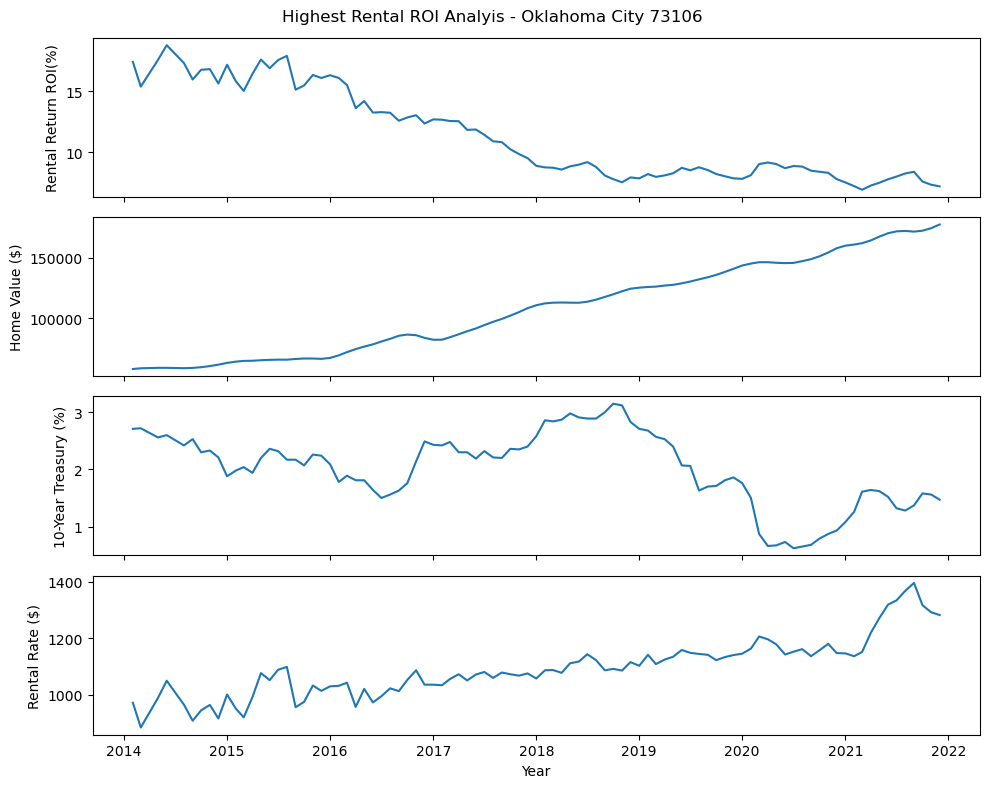

In [1200]:

y_axis_annual_roi = highest_rental_roi_zip['Annual Rental ROI (%)']
y_axis_home_value = highest_rental_roi_zip['Home Value']
y_axis_10year_treasury = highest_rental_roi_zip['10-Year Treasury']
y_axis_rental = highest_rental_roi_zip['Rental']
x_axis = highest_rental_roi_zip['Date']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex='col', figsize=(10,8))
fig.suptitle(f'Highest Rental ROI Analyis - {highest_return_city} {highest_return_zip} ')
plt.xlabel('Year')

ax1.plot(x_axis, y_axis_annual_roi)
ax1.set_ylabel('Rental Return ROI(%)')

ax2.plot(x_axis, y_axis_home_value)
ax2.set_ylabel('Home Value ($)')

ax3.plot(x_axis, y_axis_10year_treasury)
ax3.set_ylabel('10-Year Treasury (%)')

ax4.plot(x_axis, y_axis_rental)
ax4.set_ylabel('Rental Rate ($)')

fig.tight_layout()

plt.savefig('../output/homerental_roi_highest_rental_roi.png')

plt.show()

In [1194]:

lowest_rental_roi_zip = home_value_rentals_treasury_rate.loc[home_value_rentals_treasury_rate['Zip'] == lowest_return_zip, :]


In [1195]:
lowest_rental_roi_zip = lowest_rental_roi_zip.sort_values(by='Date_Conv')
lowest_rental_roi_zip

,State,City,Zip,Date,Date_Conv,Home Value,Rental,10-Year Treasury,Interest per month,Rental Returns ($),Annual Rental ROI (%)
14,OK,Edmond,73034,2014-02-01,2014-02-01,256410.966513,851.0,2.71,579.061433,271.938567,1.272669
47,OK,Edmond,73034,2014-04-01,2014-04-01,258000.362593,903.0,2.71,582.650819,320.349181,1.489994
77,OK,Edmond,73034,2014-06-01,2014-06-01,259982.165908,986.0,2.60,563.294693,422.705307,1.951081
129,OK,Edmond,73034,2014-09-01,2014-09-01,262389.491331,992.0,2.53,553.204511,438.795489,2.006767
148,OK,Edmond,73034,2014-11-01,2014-11-01,264650.171087,984.0,2.33,513.862416,470.137584,2.131739
...,...,...,...,...,...,...,...,...,...,...,...
1743,OK,Edmond,73034,2021-01-01,2021-01-01,312985.516422,1135.0,1.08,281.686965,853.313035,3.271639
1763,OK,Edmond,73034,2021-02-01,2021-02-01,315667.562116,1123.0,1.26,331.450940,791.549060,3.009048
1783,OK,Edmond,73034,2021-03-01,2021-03-01,318242.532190,1156.0,1.61,426.975397,729.024603,2.748940
1803,OK,Edmond,73034,2021-04-01,2021-04-01,321614.227968,1151.0,1.64,439.539445,711.460555,2.654586


In [1196]:
lowest_rental_roi_zip.shape

(81, 11)

In [1197]:
lowest_rental_roi_zip.isna().sum()

State                    0
City                     0
Zip                      0
Date                     0
Date_Conv                0
Home Value               0
Rental                   0
10-Year Treasury         0
Interest per month       0
Rental Returns ($)       0
Annual Rental ROI (%)    0
dtype: int64

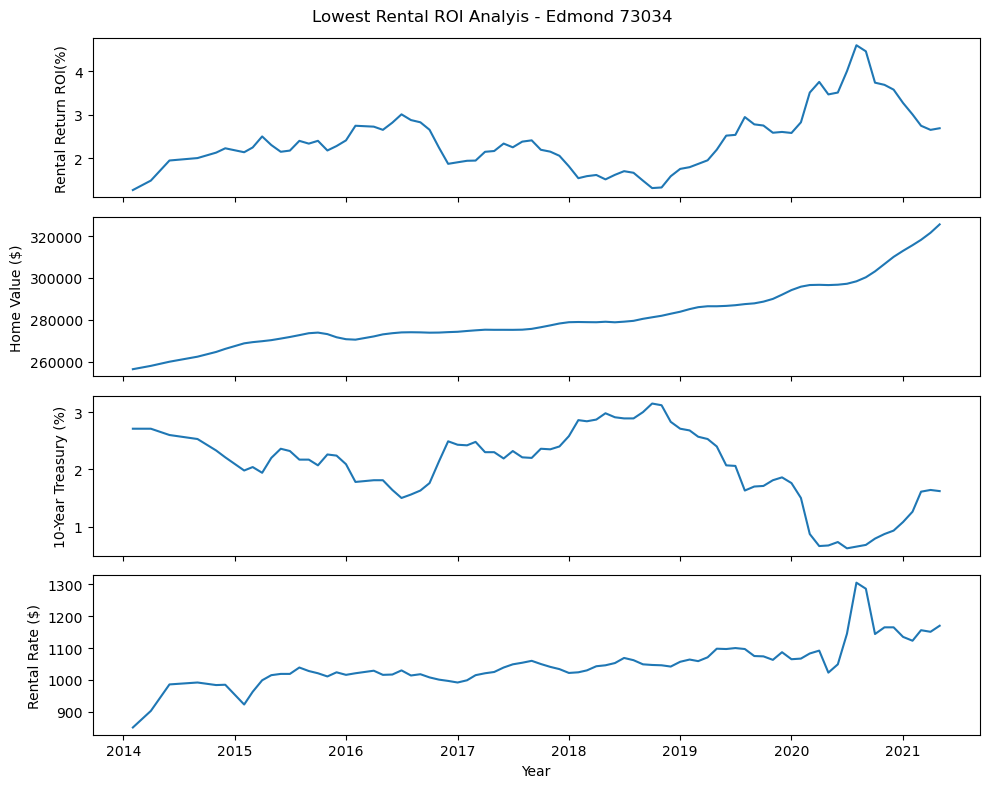

In [1202]:

y_axis_annual_roi = lowest_rental_roi_zip['Annual Rental ROI (%)']
y_axis_home_value = lowest_rental_roi_zip['Home Value']
y_axis_10year_treasury = lowest_rental_roi_zip['10-Year Treasury']
y_axis_rental = lowest_rental_roi_zip['Rental']
x_axis = lowest_rental_roi_zip['Date']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex='col', figsize=(10,8))
fig.suptitle(f'Lowest Rental ROI Analyis - {lowest_return_city} {lowest_return_zip} ')
plt.xlabel('Year')

ax1.plot(x_axis, y_axis_annual_roi)
ax1.set_ylabel('Rental Return ROI(%)')

ax2.plot(x_axis, y_axis_home_value)
ax2.set_ylabel('Home Value ($)')

ax3.plot(x_axis, y_axis_10year_treasury)
ax3.set_ylabel('10-Year Treasury (%)')

ax4.plot(x_axis, y_axis_rental)
ax4.set_ylabel('Rental Rate ($)')

fig.tight_layout()

plt.savefig('../output/homerental_roi_lowest_rental_roi.png')

plt.show()